In [1]:
%load_ext autoreload
%autoreload 2
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import os
import scipy
import pickle

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [2]:
matlab_path = os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'pbm', 'affreg', 'PbmDataHom6_norm.mat')
mat = scipy.io.loadmat(matlab_path)
data = mat['PbmData'][0]
seqs_dna =  data[0][5]
seqs_dna = [s[0][0] for s in seqs_dna]
# load the MSA sequences, one hot encoded
df, signal = bd.datasets.PBM.pbm_homeo_affreg()
# x, y = pickle.load(open('../../data/example_homeo_PbmData.pkl', 'rb'))
x, y = pickle.load(open('../annotations/pbm/example_homeo_PbmData.pkl', 'rb'))

In [3]:
# build a small subsample
x = x[1:6]
seqs_dna = seqs_dna[1:101]
signal = signal[1:6, 1:101]

In [4]:
# shift signal by adding a constant s.t. no negative values are included
signal -= np.min(signal)

In [5]:
# Set up the dataset
df = pd.DataFrame(signal.T)
df['seq'] = seqs_dna
df.index = df['seq']
del df['seq']

dataset = mb.datasets.ResiduePBMDataset(df, x)
train = tdata.DataLoader(dataset=dataset, batch_size=128, shuffle=True)

# Set up the model
model = mb.models.ProteinDNABinding(0, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()    # mean-squared error for regression

In [ ]:
mb.tl.train_network(model, train, device, optimizer, criterion, exp_max=-1, log_each=1, verbose=2)

TypeError: train_network() missing 1 required positional argument: 'reconstruction_crit'

In [ ]:
# Many more epochs (will most likely lead to overfitting)
mb.tl.train_network(model, train, device, optimizer, criterion, num_epochs=5000, exp_max=-1, log_each=200, verbose=2)

TypeError: train_network() missing 1 required positional argument: 'reconstruction_crit'

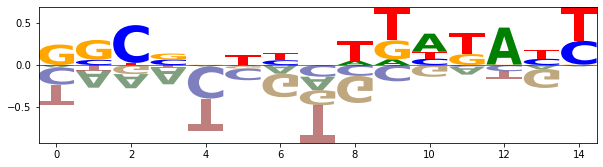

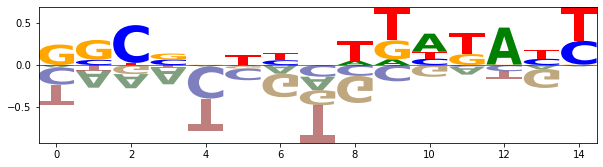

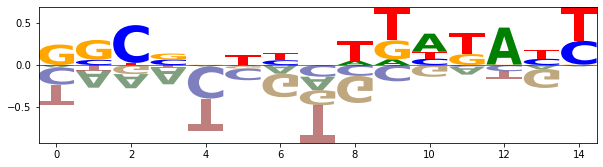

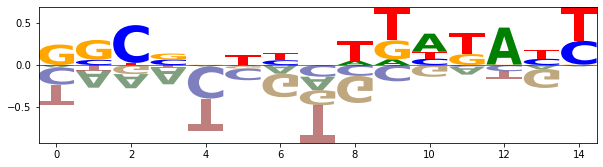

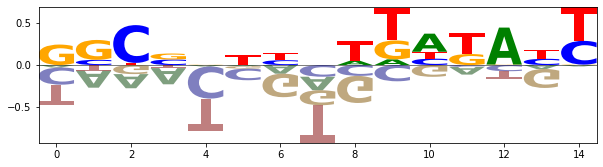

In [18]:
bm_pred = model.get_predicted_bm(torch.tensor(np.stack(x)))
bm_pred = bm_pred.cpu().detach().numpy()
bm_pred.shape
for i in range(0, bm_pred.shape[0]):
    weights = bm_pred[i]
    weights = pd.DataFrame(weights)
    weights.index = "A", "C", "G", "T"
    crp_logo = logomaker.Logo(weights.T, shade_below=0.5, fade_below=0.5)

R^2: 0.9966660760887662


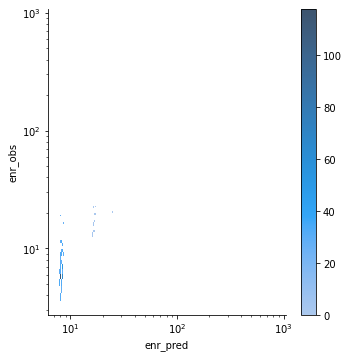

In [19]:
mb.pl.kmer_enrichment(model, train)

In [ ]:
# full dataset:

In [21]:
matlab_path = os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'pbm', 'affreg', 'PbmDataHom6_norm.mat')
mat = scipy.io.loadmat(matlab_path)
data = mat['PbmData'][0]
seqs_dna =  data[0][5]
seqs_dna = [s[0][0] for s in seqs_dna]
# load the MSA sequences, one hot encoded
df, signal = bd.datasets.PBM.pbm_homeo_affreg()
# x, y = pickle.load(open('../../data/example_homeo_PbmData.pkl', 'rb'))
x, y = pickle.load(open('../annotations/pbm/example_homeo_PbmData.pkl', 'rb'))

In [22]:
# shift signal by adding a constant s.t. no negative values are included
signal -= np.min(signal)

In [23]:
# Set up the dataset (with all data)
df = pd.DataFrame(signal.T)
df['seq'] = seqs_dna
df.index = df['seq']
del df['seq']

dataset = mb.datasets.ResiduePBMDataset(df, x)
train = tdata.DataLoader(dataset=dataset, batch_size=128, shuffle=True)

# Set up the model
model = mb.models.ProteinDNABinding(0, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()    # mean-squared error for regression

In [24]:
mb.tl.train_network(model, train, device, optimizer, criterion, num_epochs=5, exp_max=-1, log_each=1, verbose=2)

optimizing using <class 'torch.optim.adam.Adam'> and <class 'torch.nn.modules.loss.MSELoss'> n_epochs 5 early_stopping -1
lr= 0.001, weight_decay= 0, dir weight= 0
Epoch:  2, Loss: 0.378783 , best epoch: 0 secs per epoch: 1031.876 s
Epoch:  3, Loss: 0.378723 , best epoch: 1 secs per epoch: 772.402 s
Epoch:  4, Loss: 0.378752 , best epoch: 2 secs per epoch: 686.698 s
Epoch:  5, Loss: 0.378794 , best epoch: 2 secs per epoch: 643.524 s
total time: 2574.095 s
secs per epoch: 643.524 s


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


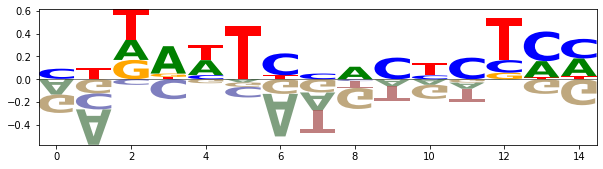

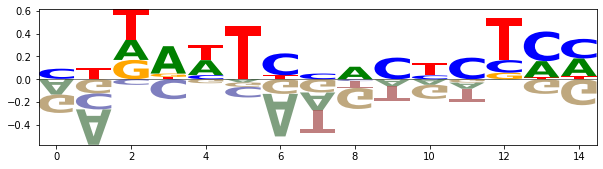

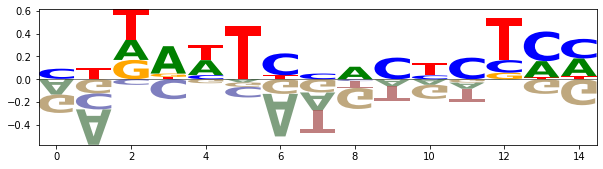

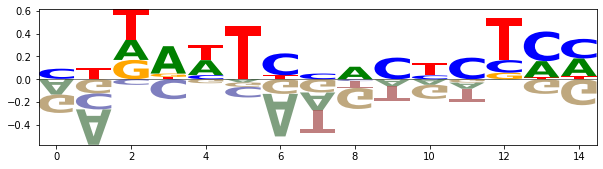

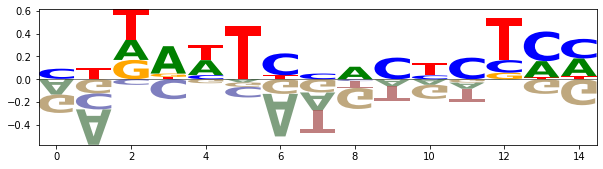

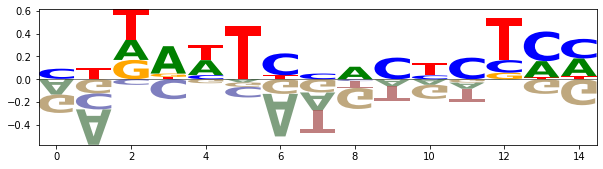

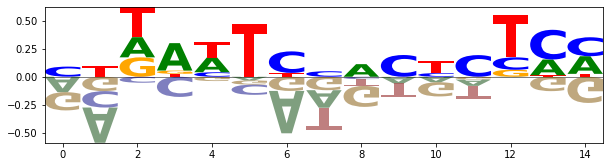

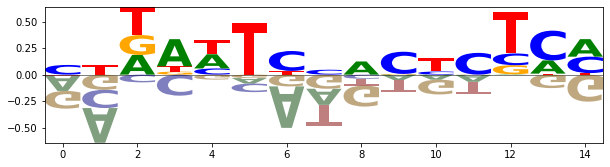

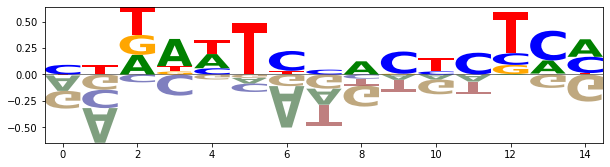

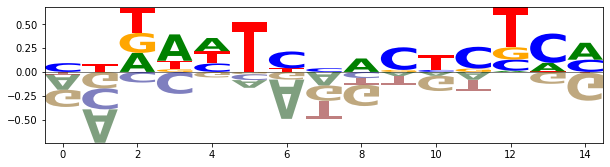

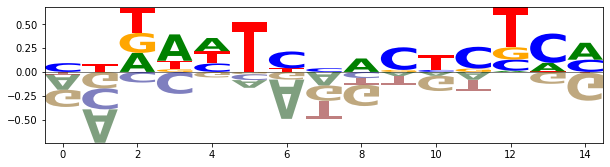

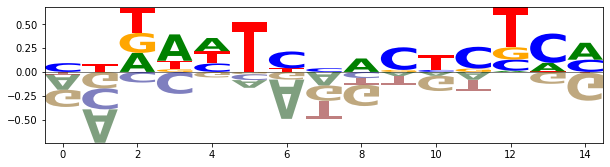

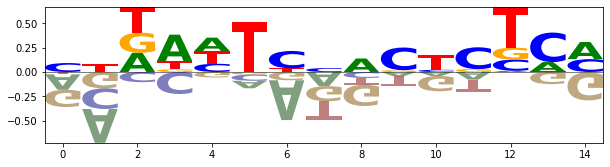

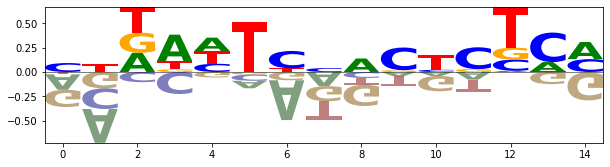

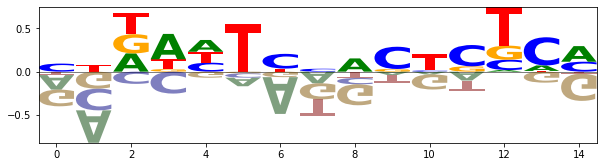

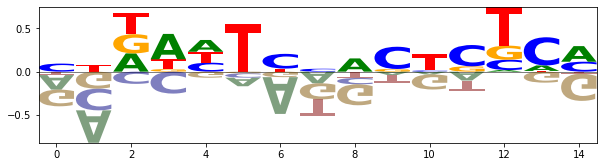

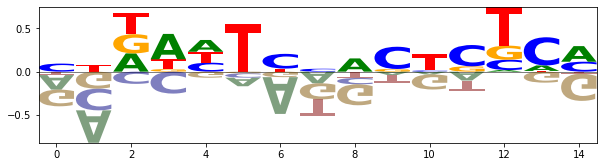

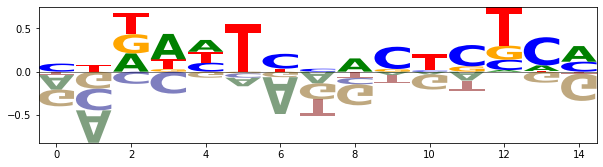

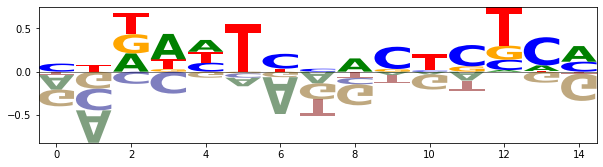

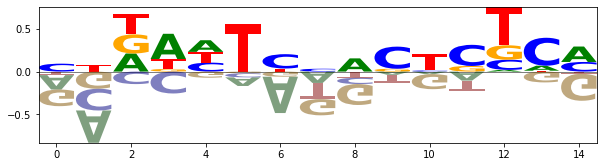

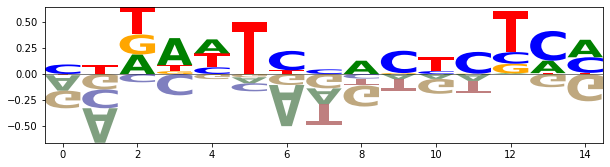

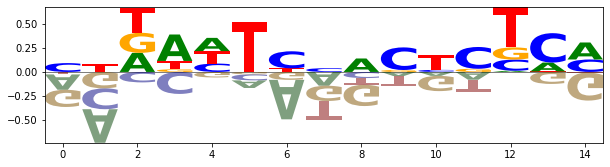

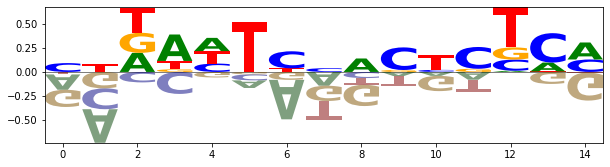

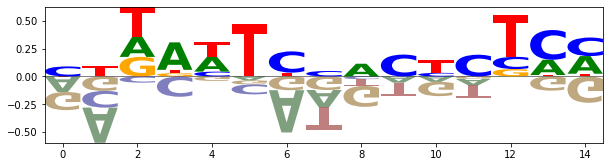

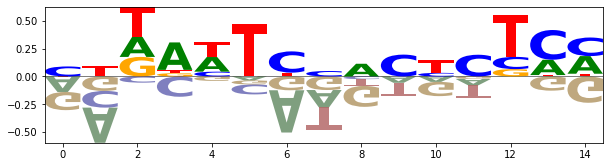

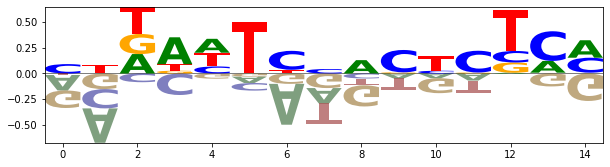

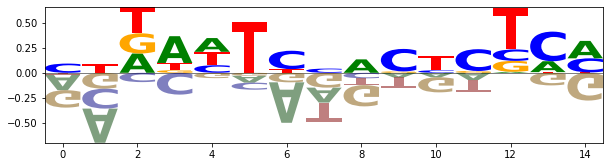

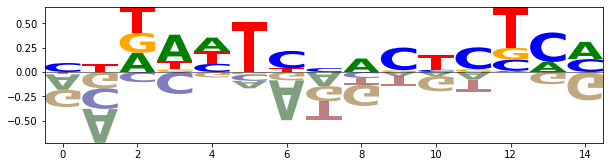

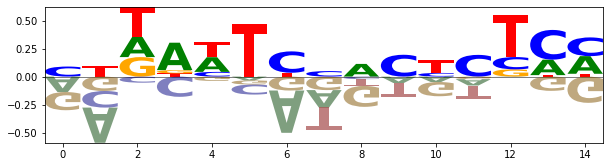

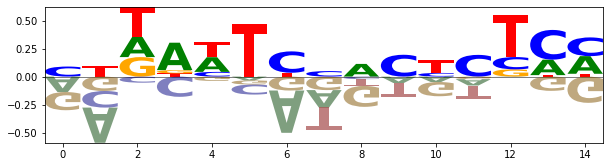

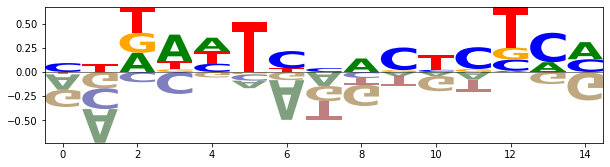

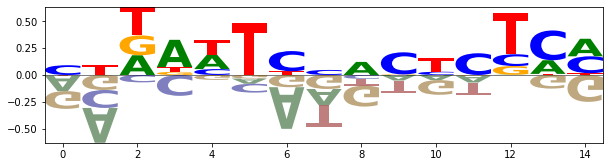

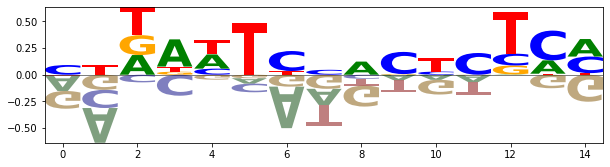

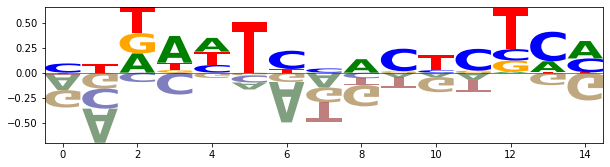

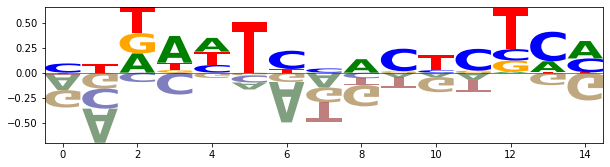

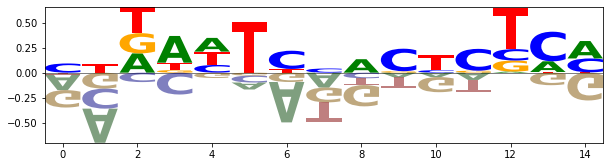

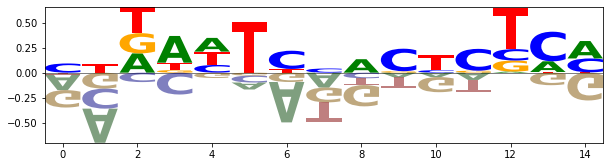

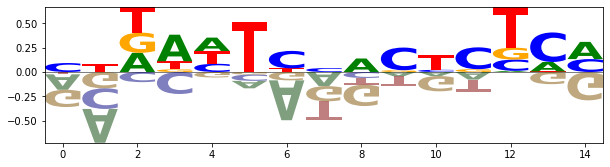

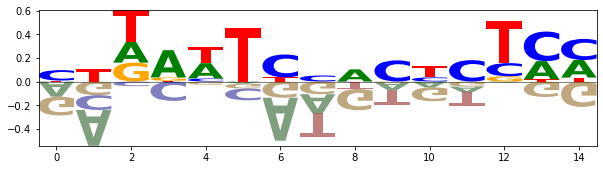

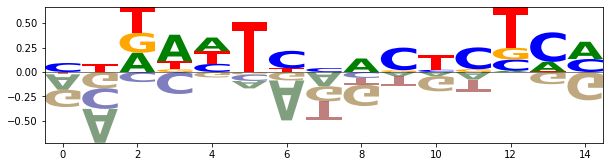

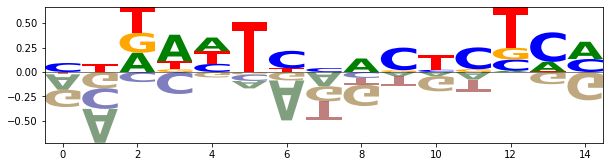

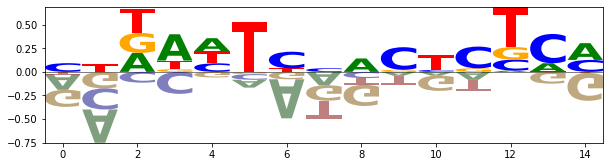

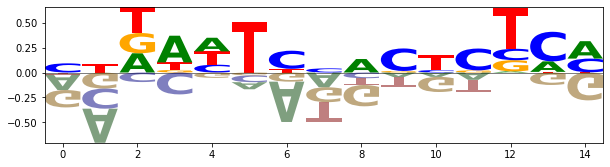

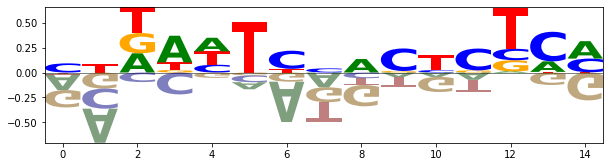

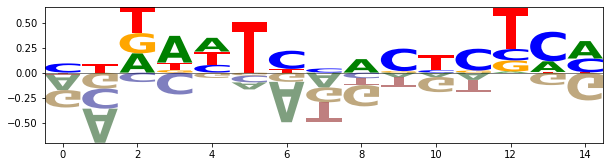

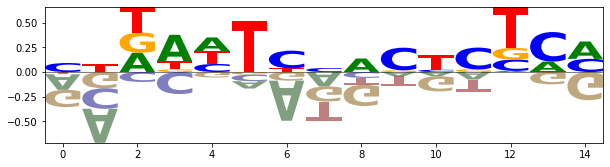

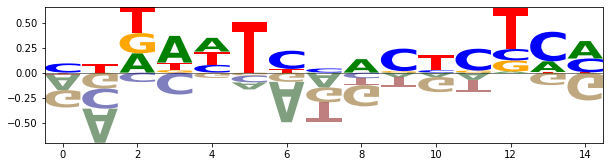

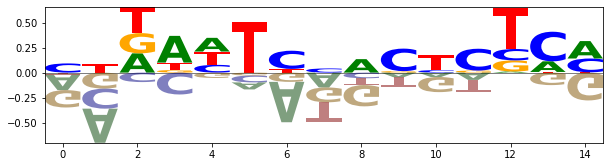

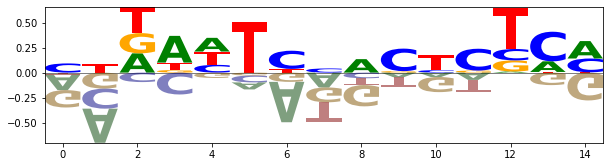

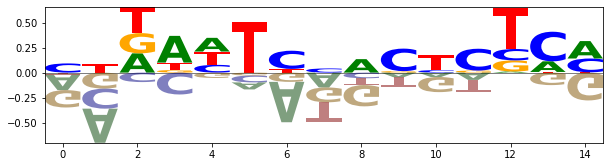

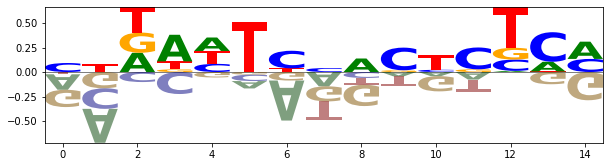

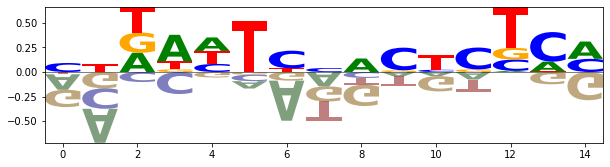

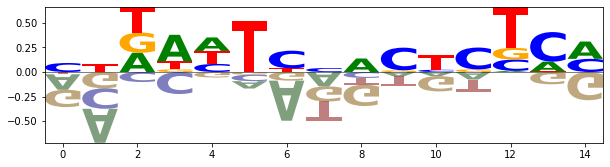

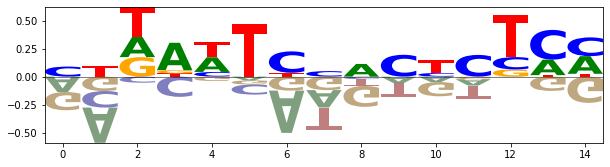

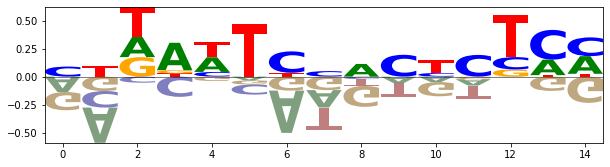

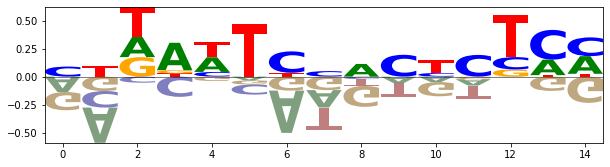

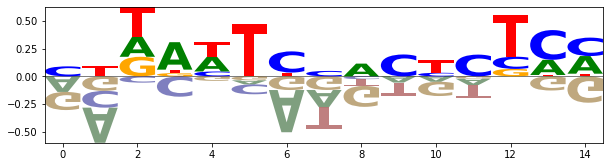

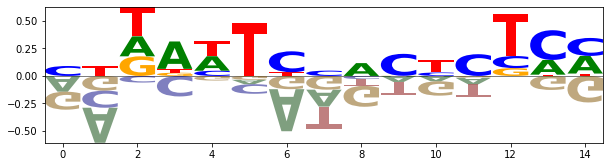

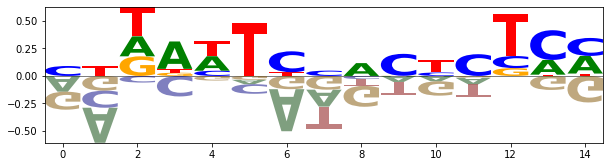

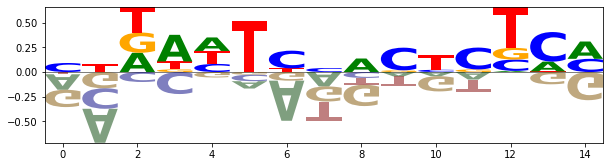

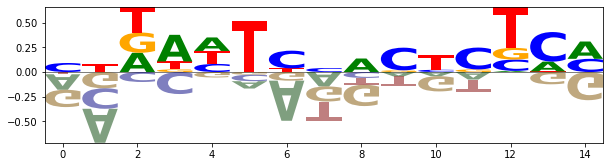

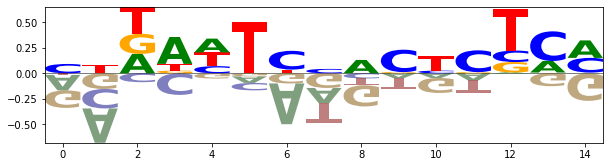

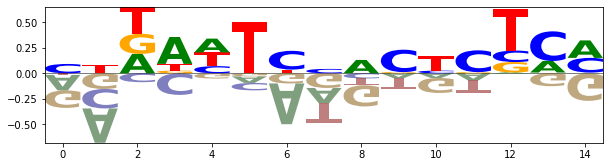

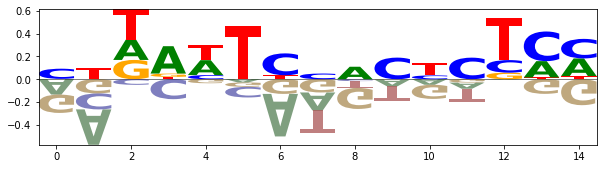

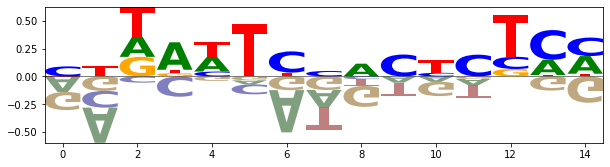

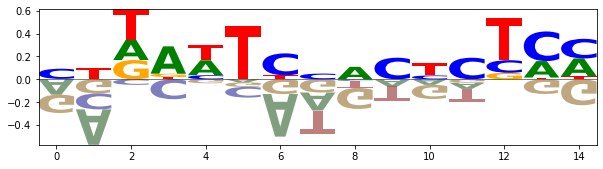

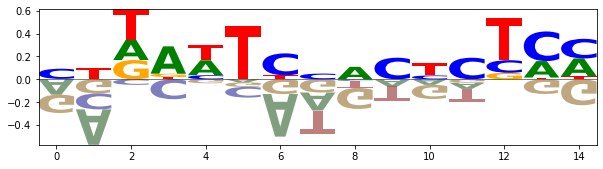

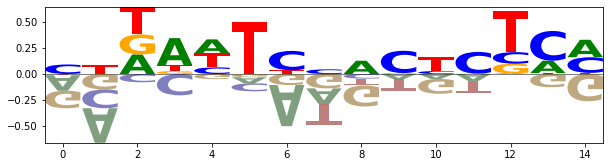

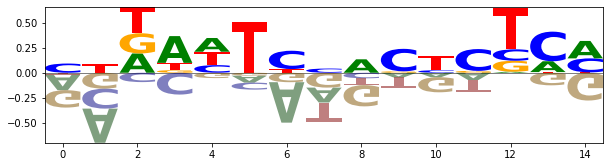

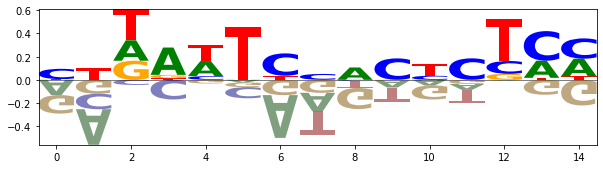

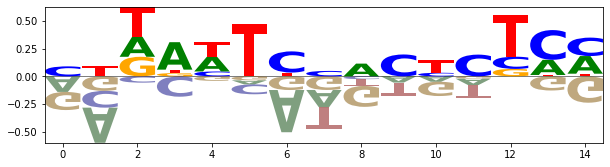

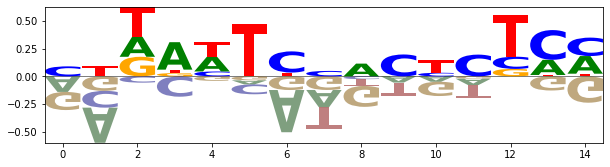

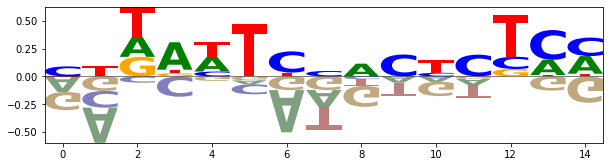

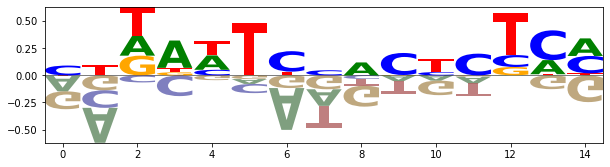

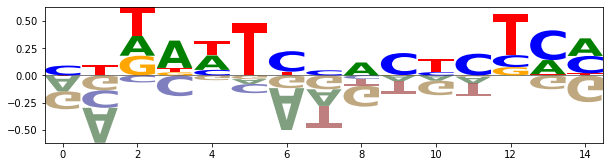

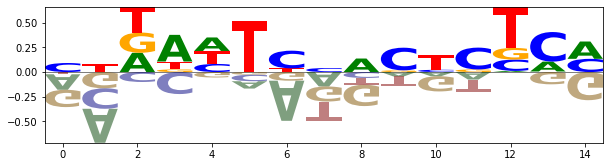

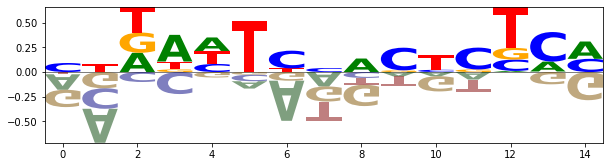

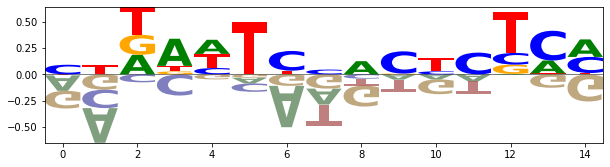

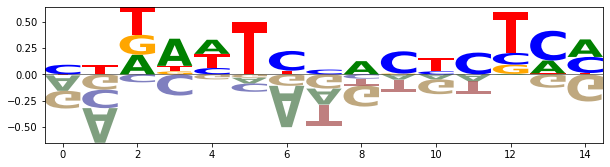

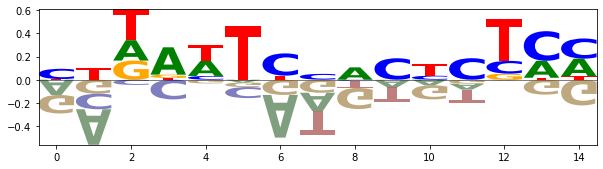

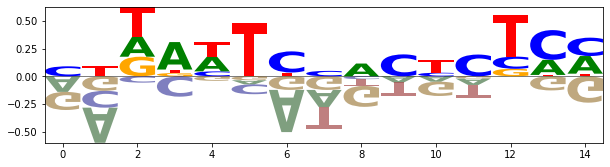

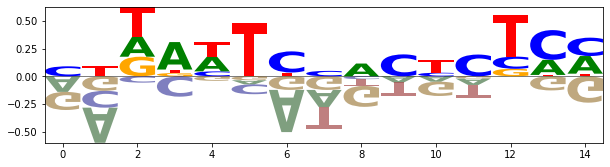

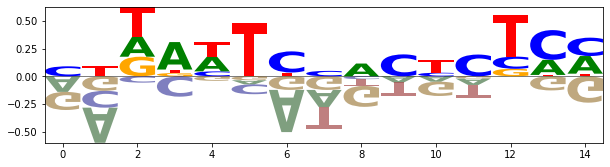

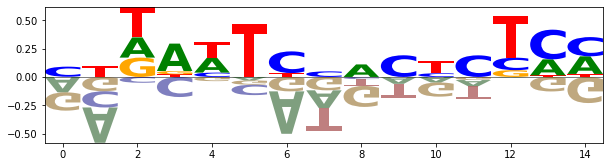

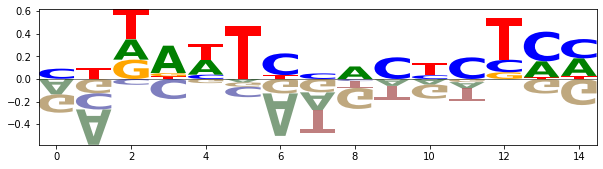

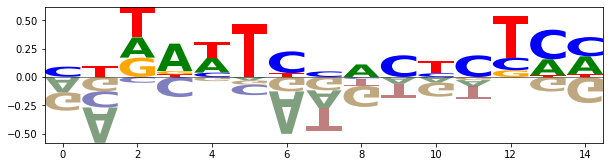

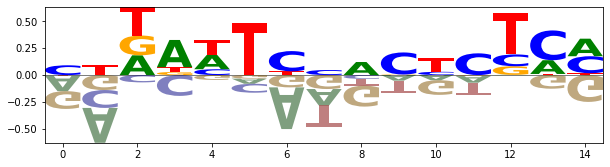

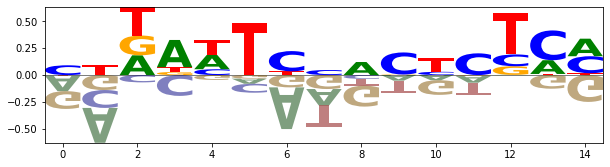

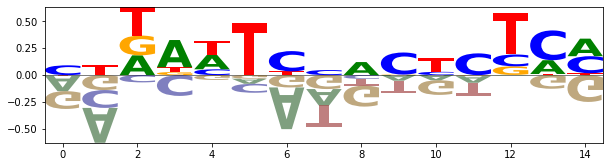

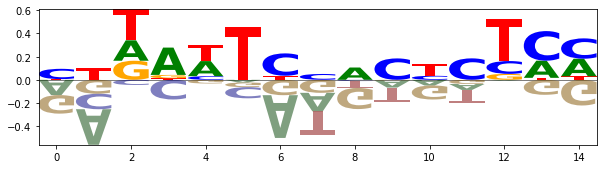

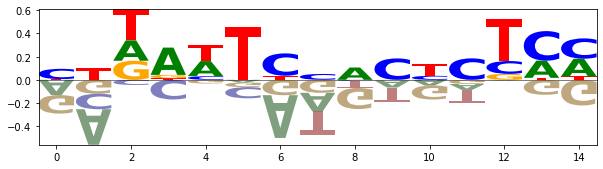

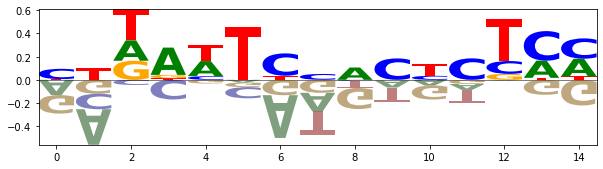

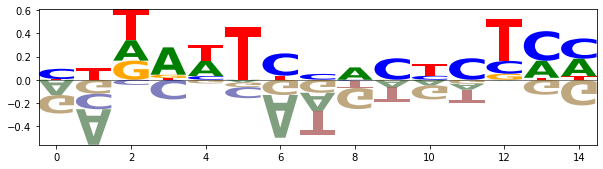

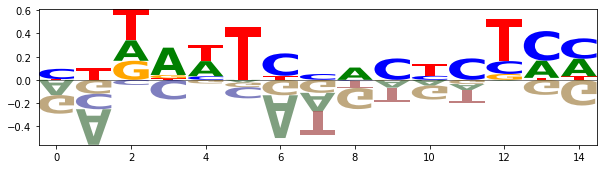

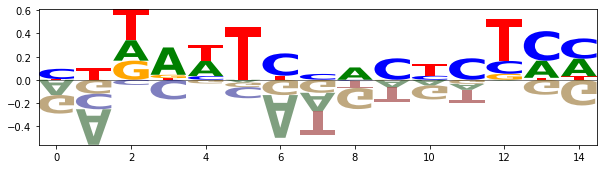

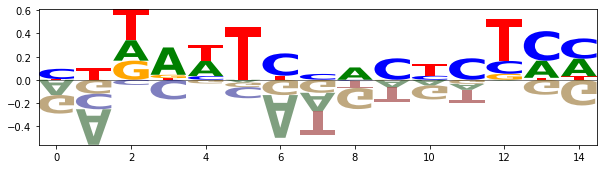

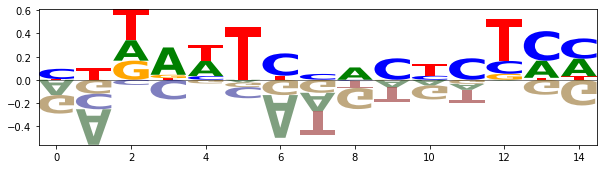

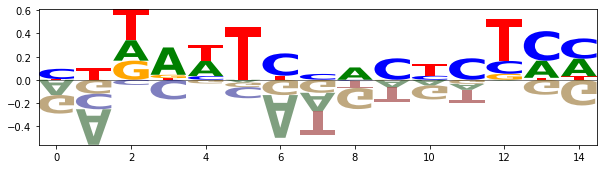

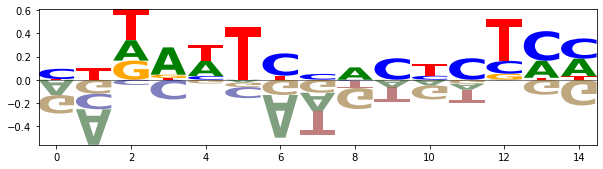

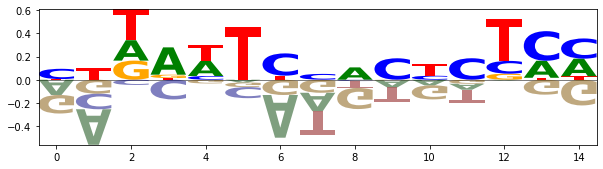

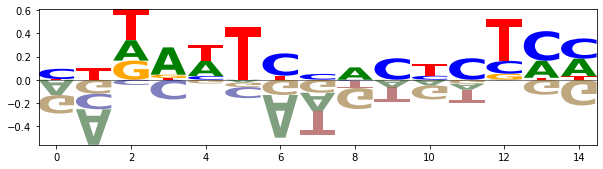

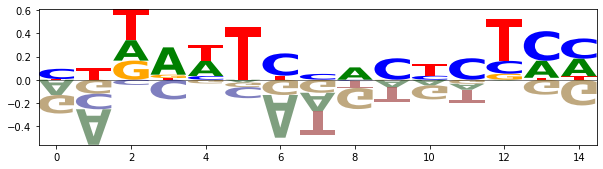

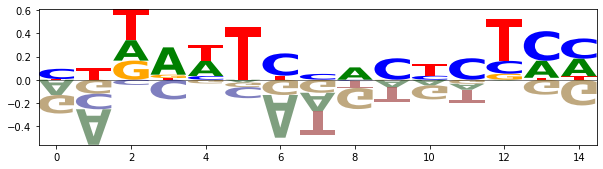

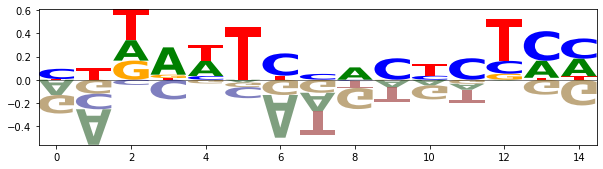

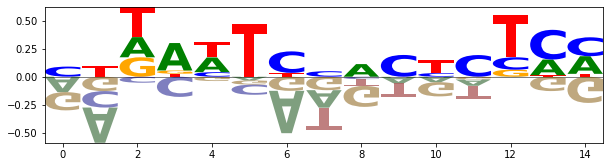

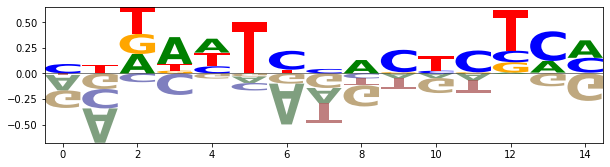

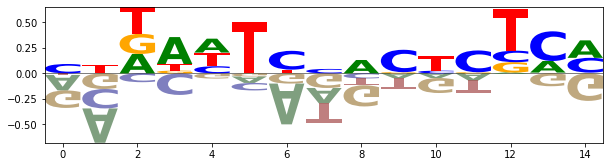

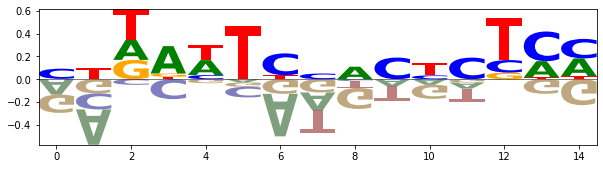

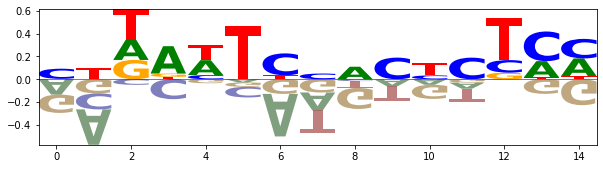

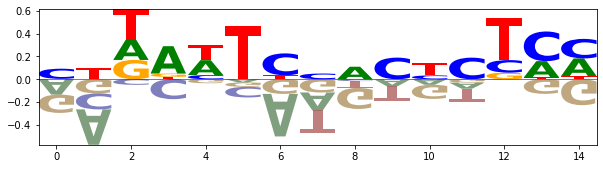

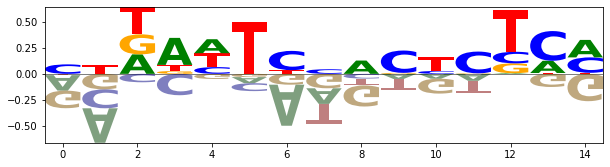

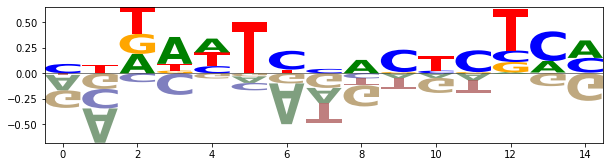

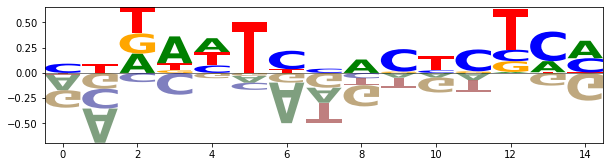

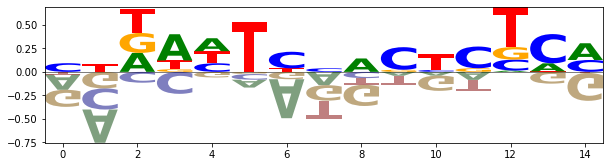

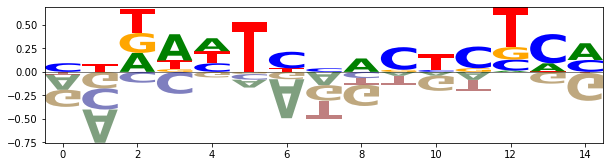

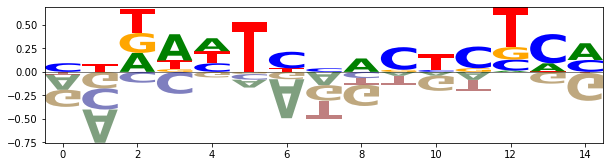

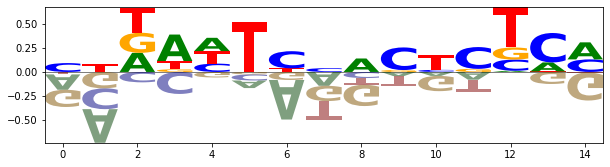

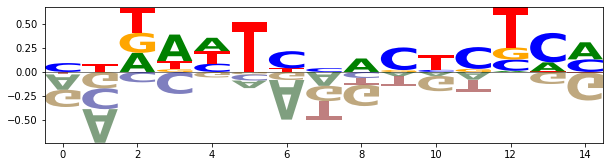

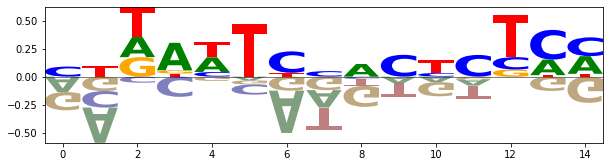

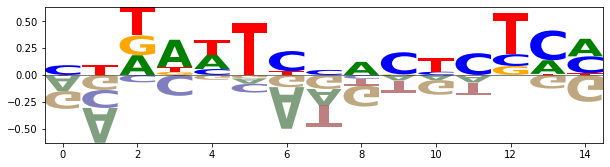

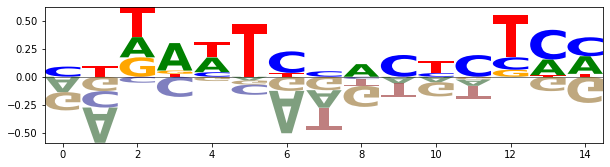

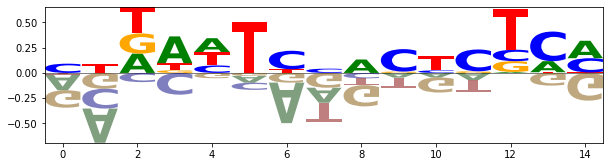

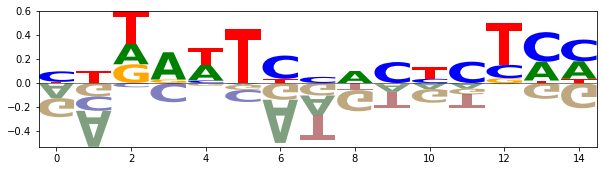

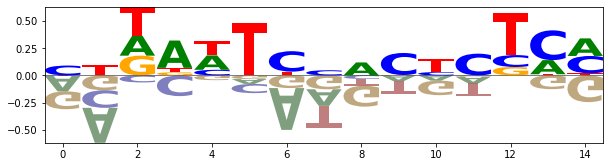

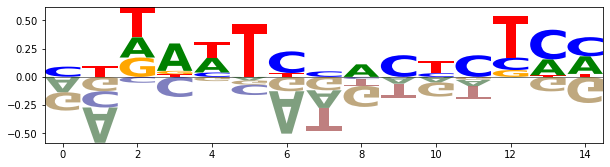

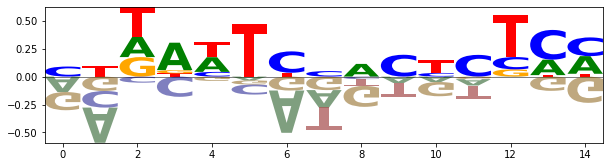

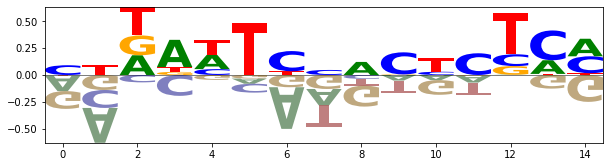

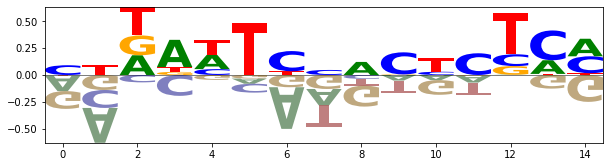

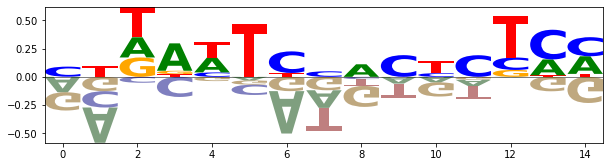

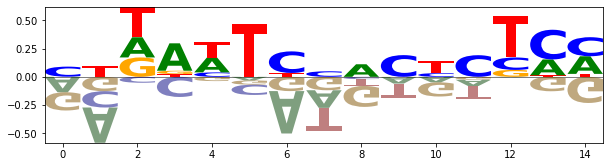

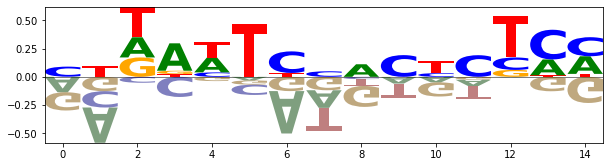

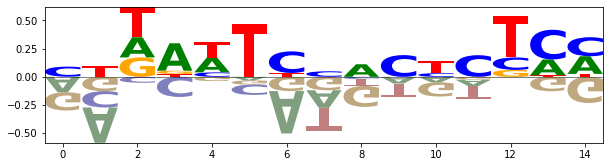

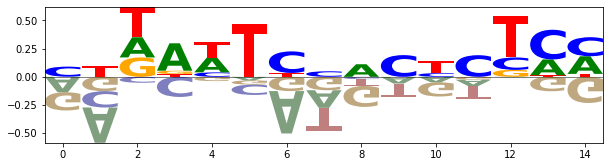

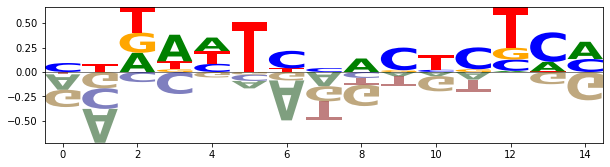

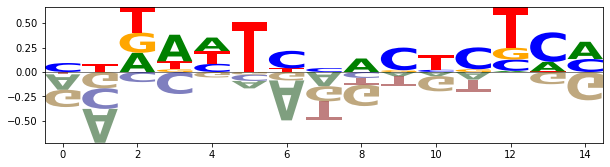

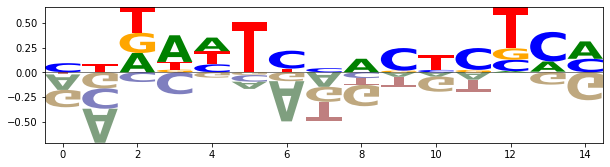

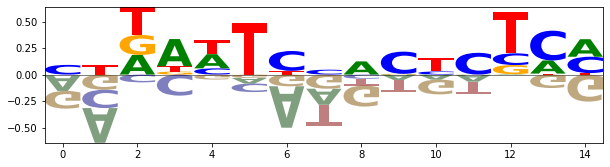

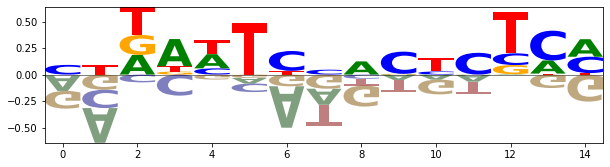

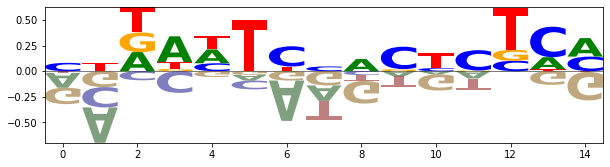

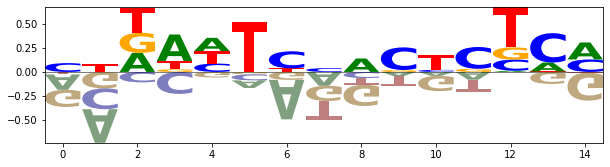

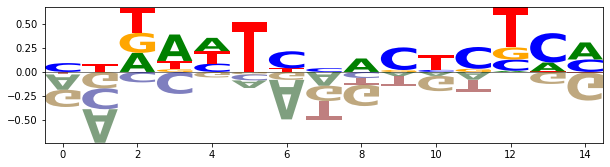

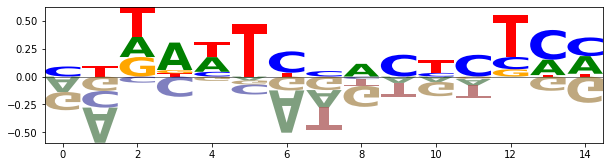

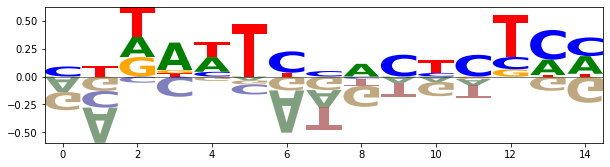

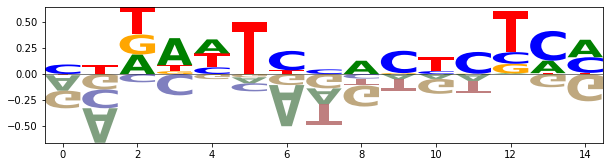

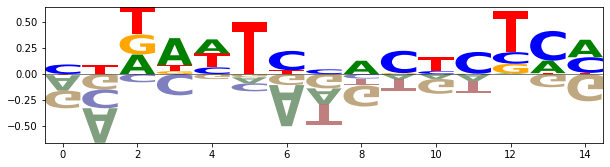

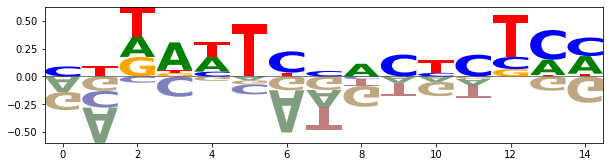

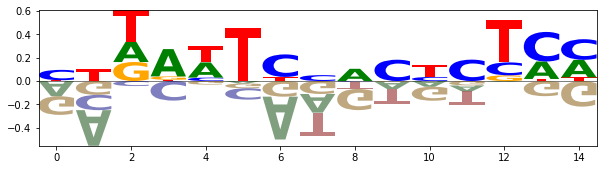

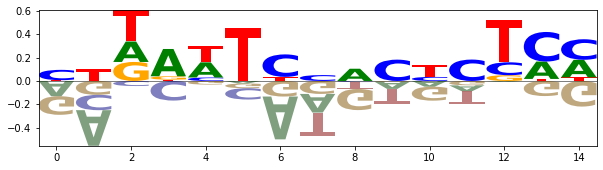

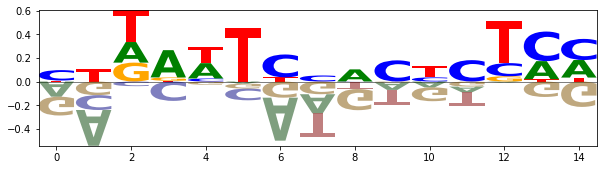

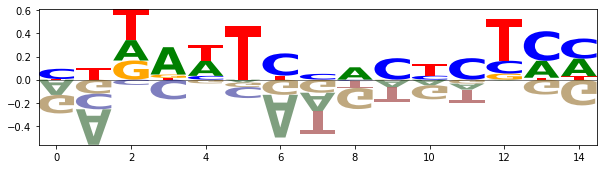

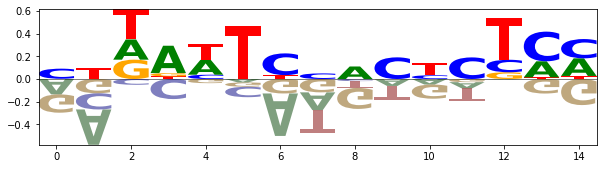

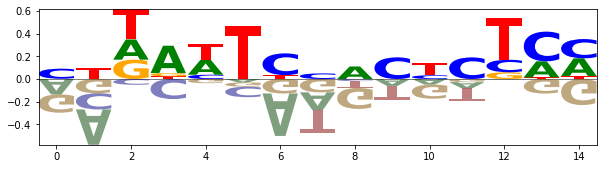

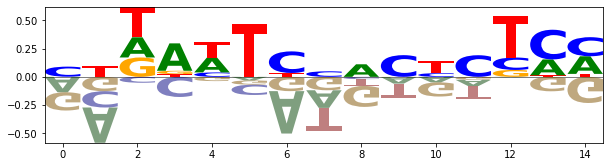

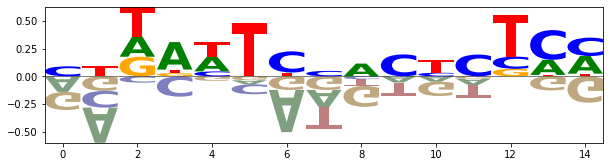

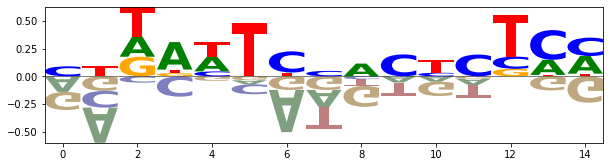

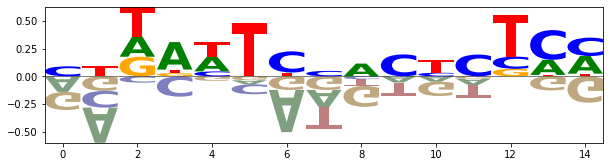

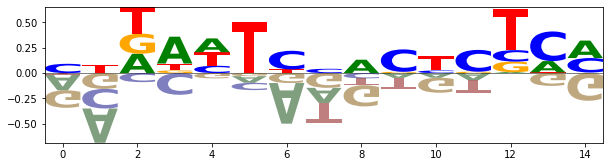

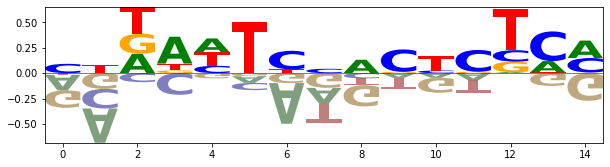

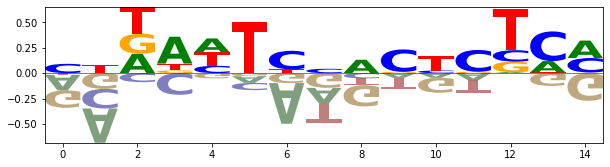

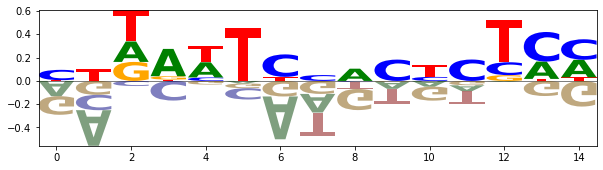

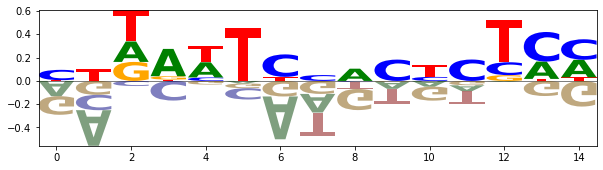

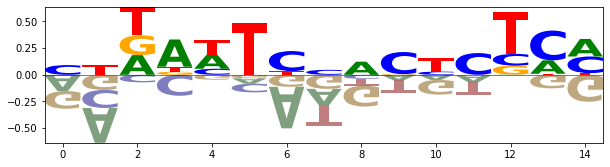

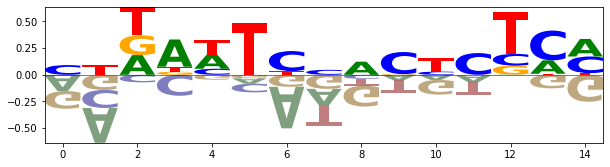

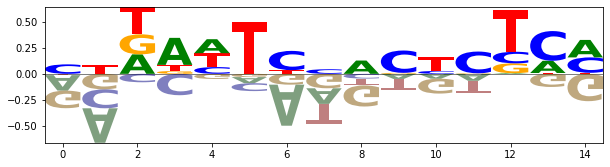

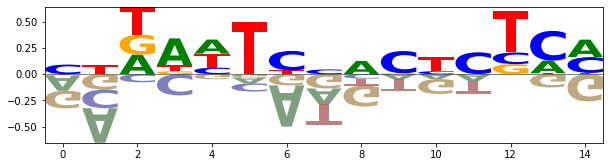

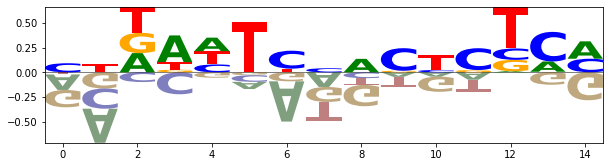

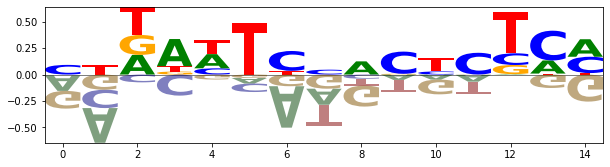

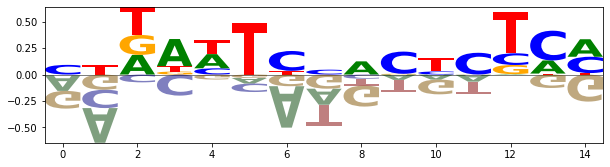

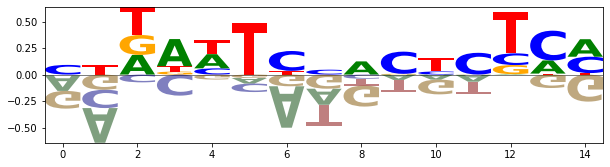

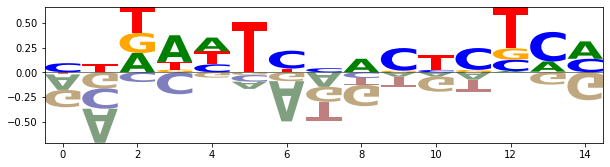

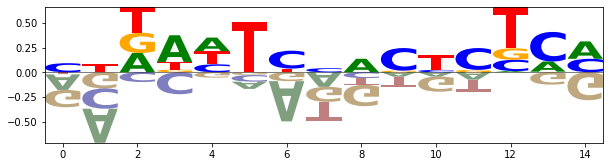

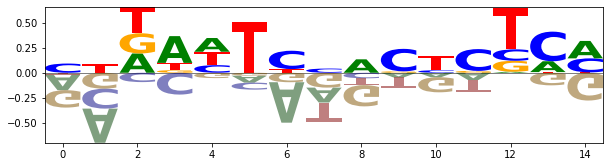

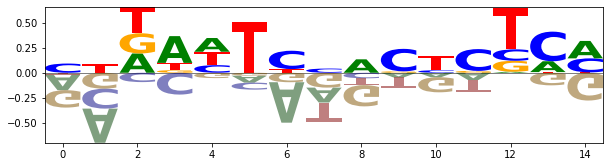

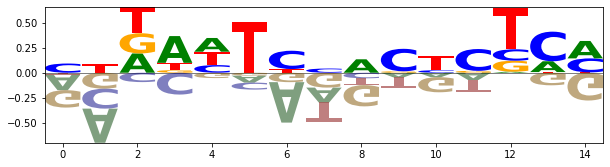

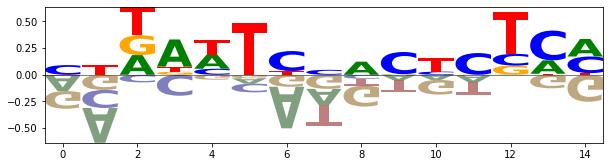

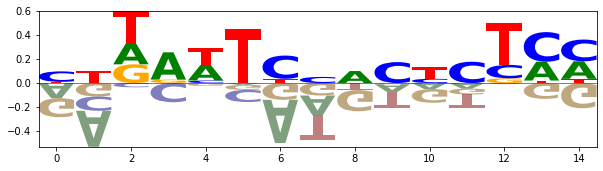

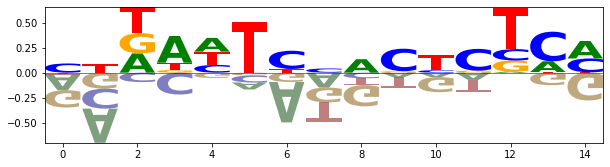

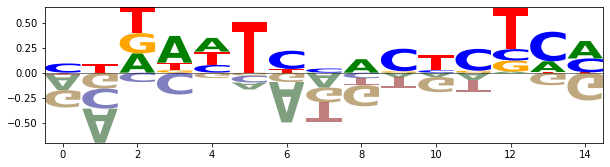

In [25]:
bm_pred = model.get_predicted_bm(torch.tensor(np.stack(x)))
bm_pred = bm_pred.cpu().detach().numpy()
bm_pred.shape
for i in range(0, bm_pred.shape[0]):
    weights = bm_pred[i]
    weights = pd.DataFrame(weights)
    weights.index = "A", "C", "G", "T"
    crp_logo = logomaker.Logo(weights.T, shade_below=0.5, fade_below=0.5)

R^2: 0.9999999718366478


MemoryError: Unable to allocate 135. GiB for an array with shape (18061524336,) and data type int64

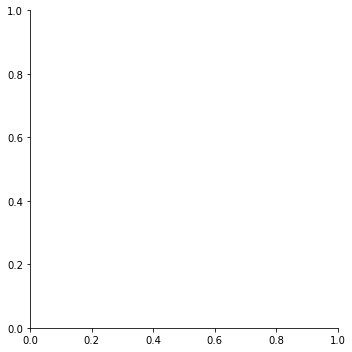

In [27]:
mb.pl.kmer_enrichment(model, train)